In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

 **Analisís de estadisticas de heroes**

### **Librerias**

In [ ]:
# Librerias
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np; np.random.seed(0)
from matplotlib import cm
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

### **Obtención de estadisticas descriptivas**

 **Se obtiene la información del la tabla com la cantidad de datos que se tiene, las variables y los timpos de datos de cada variable:**

In [ ]:
CharStat = pd.read_csv('charcters_stats.csv')
print(CharStat)
CharStat.info()

                Name Alignment  Intelligence  ...  Power  Combat  Total
0            3-D Man      good            50  ...     25      52    233
1             A-Bomb      good            38  ...     17      64    316
2         Abe Sapien      good            88  ...     35      85    299
3           Abin Sur      good            50  ...     84      65    406
4        Abomination       bad            63  ...     55      95    436
..               ...       ...           ...  ...    ...     ...    ...
606     Yellowjacket      good            88  ...     12      14    164
607  Yellowjacket II      good            50  ...     31      28    182
608             Ymir      good            50  ...     83      28    388
609          Zatanna      good            75  ...    100      56    292
610             Zoom       bad            50  ...     72      28    288

[611 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Col

**Se ordena la tabla en dependiendo si el personaje es malo, bueno o neutral:**

In [ ]:
Sorted = CharStat['Alignment'].sort_values(ascending = True)
print(Sorted)

610        bad
390        bad
391        bad
201        bad
242        bad
        ...   
238    neutral
557    neutral
544    neutral
186    neutral
477    neutral
Name: Alignment, Length: 611, dtype: object


**Se separa la tabla en 3 dependiendo si el personaje es bueno, malo o neutral**

In [ ]:
CharStat_Bad = CharStat[(CharStat.Alignment == "bad")]
print(CharStat_Bad)

               Name Alignment  Intelligence  ...  Power  Combat  Total
4       Abomination       bad            63  ...     55      95    436
5           Abraxas       bad            88  ...    100      56    526
11       Air-Walker       bad            50  ...    100      40    460
16            Amazo       bad            75  ...    100     100    575
17             Ammo       bad             1  ...      0       1      5
..              ...       ...           ...  ...    ...     ...    ...
586            Warp       bad            38  ...     63      50    212
590       Weapon XI       bad             1  ...      0       1      5
593  Willis Stryker       bad            38  ...     41      60    206
605     Yellow Claw       bad             1  ...      0       1      5
610            Zoom       bad            50  ...     72      28    288

[167 rows x 9 columns]


In [ ]:
CharStat_Good = CharStat[(CharStat.Alignment == "good")]
print(CharStat_Good)

                Name Alignment  Intelligence  ...  Power  Combat  Total
0            3-D Man      good            50  ...     25      52    233
1             A-Bomb      good            38  ...     17      64    316
2         Abe Sapien      good            88  ...     35      85    299
3           Abin Sur      good            50  ...     84      65    406
6        Adam Monroe      good            63  ...     71      64    320
..               ...       ...           ...  ...    ...     ...    ...
604            X-Man      good            88  ...     92      84    465
606     Yellowjacket      good            88  ...     12      14    164
607  Yellowjacket II      good            50  ...     31      28    182
608             Ymir      good            50  ...     83      28    388
609          Zatanna      good            75  ...    100      56    292

[432 rows x 9 columns]


In [ ]:
CharStat_Neutral = CharStat[(CharStat.Alignment == "neutral")]
print(CharStat_Neutral)

             Name Alignment  Intelligence  ...  Power  Combat  Total
28     Anti-Venom   neutral            75  ...     85      84    459
82        Bizarro   neutral            75  ...     95      85    550
186      Deadpool   neutral            50  ...    100     100    395
189   Deathstroke   neutral            75  ...     36      90    366
238      Galactus   neutral           100  ...    100      70    553
318    Juggernaut   neutral            44  ...     74      70    430
357       Man-Bat   neutral            38  ...     33      30    239
451         Raven   neutral            50  ...     62      40    261
454      Red Hood   neutral            75  ...     24      95    257
477       Sandman   neutral            50  ...     62      56    387
544  The Comedian   neutral            63  ...     12      80    196
557          Toad   neutral            50  ...     49      28    275

[12 rows x 9 columns]


**Se obtienen las metricas de dispersión de los personajes 'BAD'**

In [ ]:
CharStat_Bad_MAX = CharStat_Bad[CharStat_Bad.Total == CharStat_Bad.Total.max()]
CharStat_Bad_Des = CharStat_Bad.describe()
VM = CharStat_Bad.var()
MM = CharStat_Bad.median()
print('Varianza Personajes Malos:\n',VM)
print('Mediana Personajes Malos:\n', MM)
RangoM = CharStat_Bad_Des.Total[7] - CharStat_Bad_Des.Total[3]
print('\nRango de Total: ', RangoM)
print('\n                               Metricas de dispersion')
CharStat_Bad_Des1 = CharStat_Bad_Des.T
CharStat_Bad_MAX

Varianza Personajes Malos:
 Intelligence     1253.297165
Strength         1190.640719
Speed             672.399466
Durability       1433.655580
Power            1283.424789
Combat           1050.611067
Total           30608.022148
dtype: float64
Mediana Personajes Malos:
 Intelligence     50.0
Strength         13.0
Speed            23.0
Durability       42.0
Power            45.0
Combat           56.0
Total           268.0
dtype: float64

Rango de Total:  574.0

                               Metricas de dispersion


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579


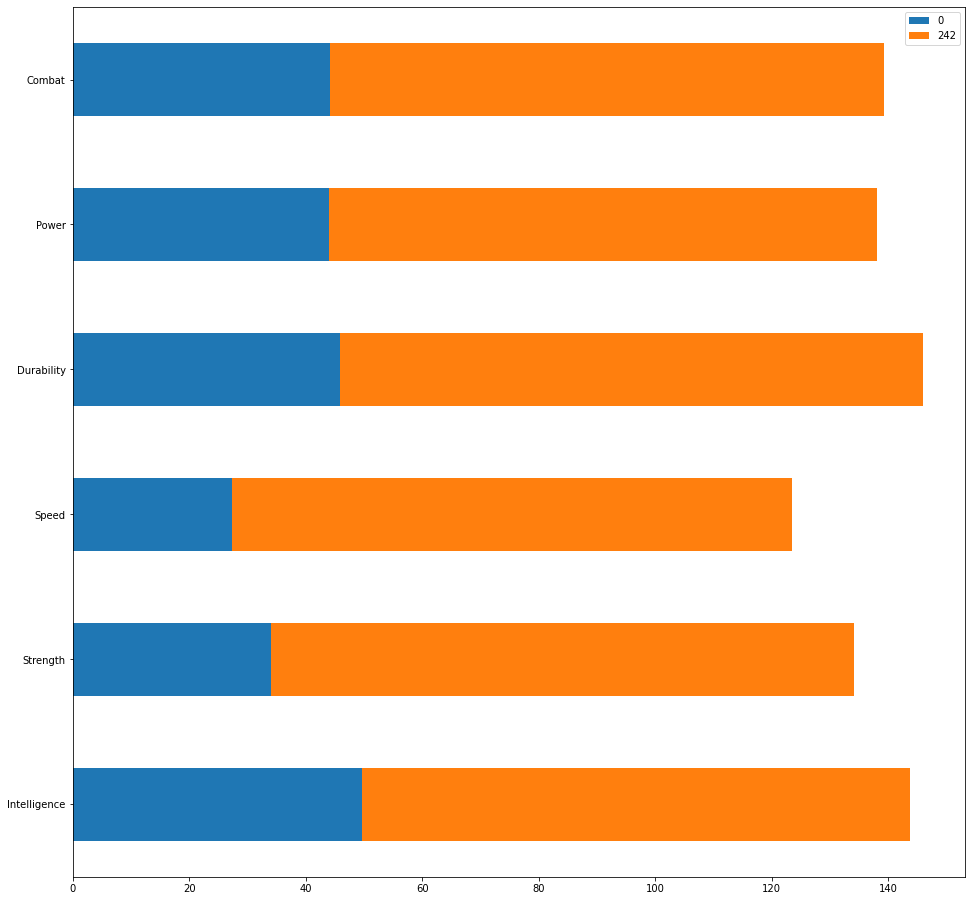

In [ ]:
CharStat_Bad_M = CharStat_Bad.mean().drop(['Total'])
CSBM = CharStat_Bad_MAX.iloc[0].drop(['Alignment','Name','Total'])
BADrra = pd.concat([CharStat_Bad_M,CSBM],axis = 1)
BADrra.plot.barh(stacked = True)

**Se obtienen las metricas de dispersión de los personajes 'GOOD'**

In [ ]:
CharStat_Good_MAX = CharStat_Good[CharStat_Good.Total == CharStat_Good.Total.max()]
CharStat_Good_Des = CharStat_Good.describe()
CharStat_Good_Des1 = CharStat_Good_Des.T

VB = CharStat_Good.var()
MB = CharStat_Good.median()
print('Varianza Personajes Buenos:\n', VB)
print('Mediana Personajes Buenos:\n', MB)
CharStat_Good_Des = CharStat_Good.describe()
RangoB = CharStat_Good_Des.Total[7] - CharStat_Good_Des.Total[3]
print('\nRango de Total: ', RangoB)
print('\n                               Metricas de dispersion')
CharStat_Good_Des
CharStat_Good_MAX

Varianza Personajes Buenos:
 Intelligence     1017.726197
Strength          987.349575
Speed             651.831056
Durability       1266.351889
Power            1148.907773
Combat           1125.786151
Total           26668.691329
dtype: float64
Mediana Personajes Buenos:
 Intelligence     50.0
Strength         10.0
Speed            23.0
Durability       28.0
Power            35.0
Combat           42.0
Total           244.0
dtype: float64

Rango de Total:  576.0

                               Metricas de dispersion


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


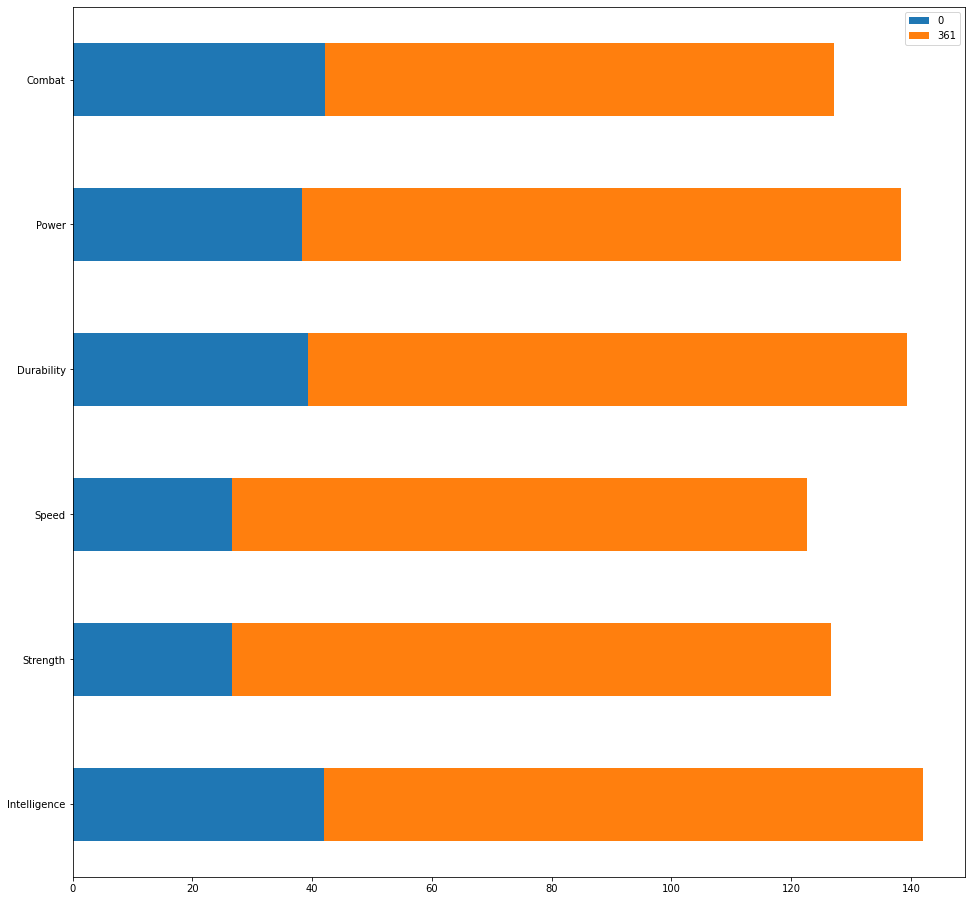

In [ ]:
CharStat_Good_M = CharStat_Good.mean().drop(['Total'])
CSGM = CharStat_Good_MAX.iloc[0].drop(['Alignment','Name','Total'])
Goodrra = pd.concat([CharStat_Good_M,CSGM],axis = 1)
Goodrra.plot.barh(stacked = True)

**Se obtienen las metricas de dispersión de los personajes 'NEUTRAL'**

In [ ]:
CharStat_Neutral_MAX = CharStat_Neutral[CharStat_Neutral.Total == CharStat_Neutral.Total.max()]
CharStat_Neutral_Des = CharStat_Neutral.describe()
CharStat_Neutral_Des1 = CharStat_Neutral_Des.T

VN = CharStat_Neutral.var()
MN = CharStat_Neutral.median()
print('Varianza Personajes Neutrales:\n', VN)
print('Mediana de Personajes Neutrales:\n', MN)
CharStat_Neutral_Des = CharStat_Neutral.describe()
RangoN = CharStat_Neutral_Des.Total[7] - CharStat_Neutral_Des.Total[3]
print('\nRango de Total: ', RangoN)
print('\n                               Metricas de dispersion')
CharStat_Neutral_MAX 

Varianza Personajes Neutrales:
 Intelligence      326.992424
Strength         1352.810606
Speed             618.022727
Durability        967.477273
Power             933.454545
Combat            626.727273
Total           14456.363636
dtype: float64
Mediana de Personajes Neutrales:
 Intelligence     56.5
Strength         32.0
Speed            44.5
Durability       93.5
Power            62.0
Combat           75.0
Total           376.5
dtype: float64

Rango de Total:  357.0

                               Metricas de dispersion


,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,62.083333,46.916667,48.250000,76.750000,61.000000,69.000000,364.000000
std,18.082932,36.780574,24.860063,31.104297,30.552488,25.034522,120.234619
min,38.000000,10.000000,17.000000,10.000000,12.000000,28.000000,196.000000
25%,50.000000,14.750000,29.750000,66.500000,35.250000,52.000000,260.000000
50%,56.500000,32.000000,44.500000,93.500000,62.000000,75.000000,376.500000
75%,75.000000,80.000000,59.750000,100.000000,87.500000,86.250000,437.250000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,553.000000


Intelligence    100
Strength        100
Speed            83
Durability      100
Power           100
Combat           70
Name: 238, dtype: object

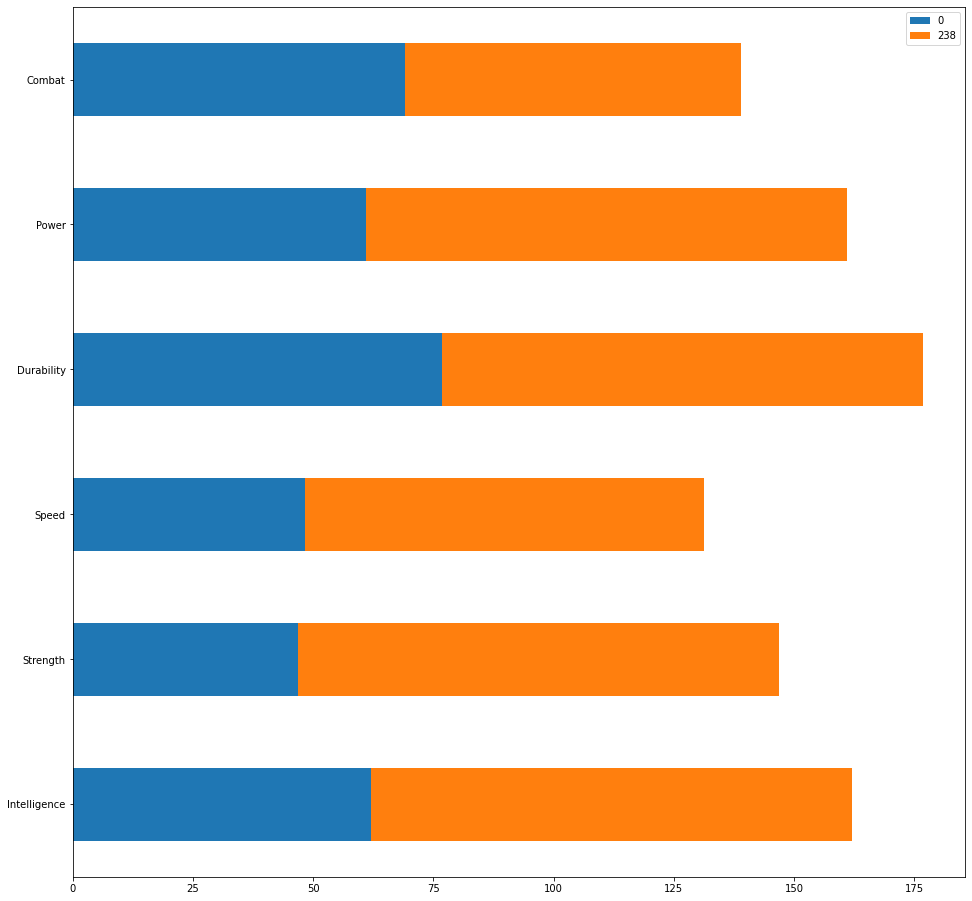

In [ ]:
CharStat_Neutral_M = CharStat_Neutral.mean().drop(['Total'])
CSNM = CharStat_Neutral_MAX.iloc[0].drop(['Alignment','Name','Total'])
Neutralrra = pd.concat([CharStat_Neutral_M,CSNM],axis = 1)
Neutralrra.plot.barh(stacked = True)

**Se obtiene el personaje con mejor y peor puntaje de todos los datos**

In [ ]:
VG = CharStat.var()
MG = CharStat.median()
print('Varianza General:', VG)
print('Mediana de General:', MG)
CharStat_Des = CharStat.describe()
RangoG = CharStat_Des.Total[7] - CharStat_Des.Total[3]
print('Rango de Total: ', RangoG)
CharStat_Des

Varianza General: Intelligence     1084.037289
Strength         1063.473349
Speed             663.586504
Durability       1335.452921
Power            1193.005398
Combat           1106.914781
Total           27997.332274
dtype: float64
Mediana de General: Intelligence     50.0
Strength         10.0
Speed            23.0
Durability       32.0
Power            37.0
Combat           50.0
Total           255.0
dtype: float64
Rango de Total:  576.0


,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


# Analisis De Datos
*   Tomando en cuenta el total de datos con todas sus medidas de dispeción podemos darnos cuenta que existe una gran disparidad en todas y cada una de las estadisticas, esto siendo demostrado por medio de la desviación estandar en las cuales tenemos numero exorbitantes que salen por completo de la media de valores de la base de datos. Tambien logramos comprobar que la mediana en todos los casos de las estadisticas se encontraba bastante por debajo de la media que nosotros esperabamos conseguir la cual teniendo valores entre 0 y 100 considerabamos lo mas logico contar con una media cercana a 50 en todas las estadisticas pero no consegimos niguno de estas hipotesis.




### **Mapas de calor y boxplots**

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
#Plot de Graficas Completas
plt.rcParams['figure.figsize'] = (16, 16)

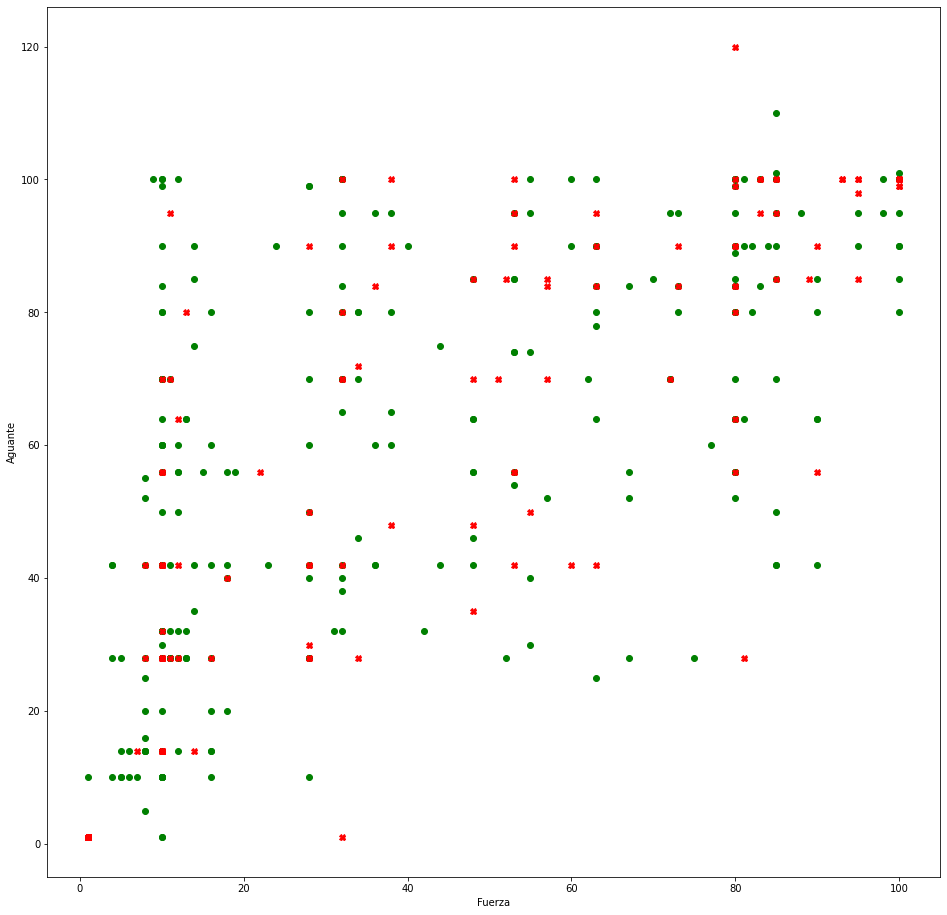

In [ ]:
plt.plot(CharStat_Good.Strength, CharStat_Good.Durability, 'o', color = 'green')
plt.plot(CharStat_Bad.Strength, CharStat_Bad.Durability, 'X', color = 'red')
plt.xlabel("Fuerza")
plt.ylabel("Aguante")
plt.show()

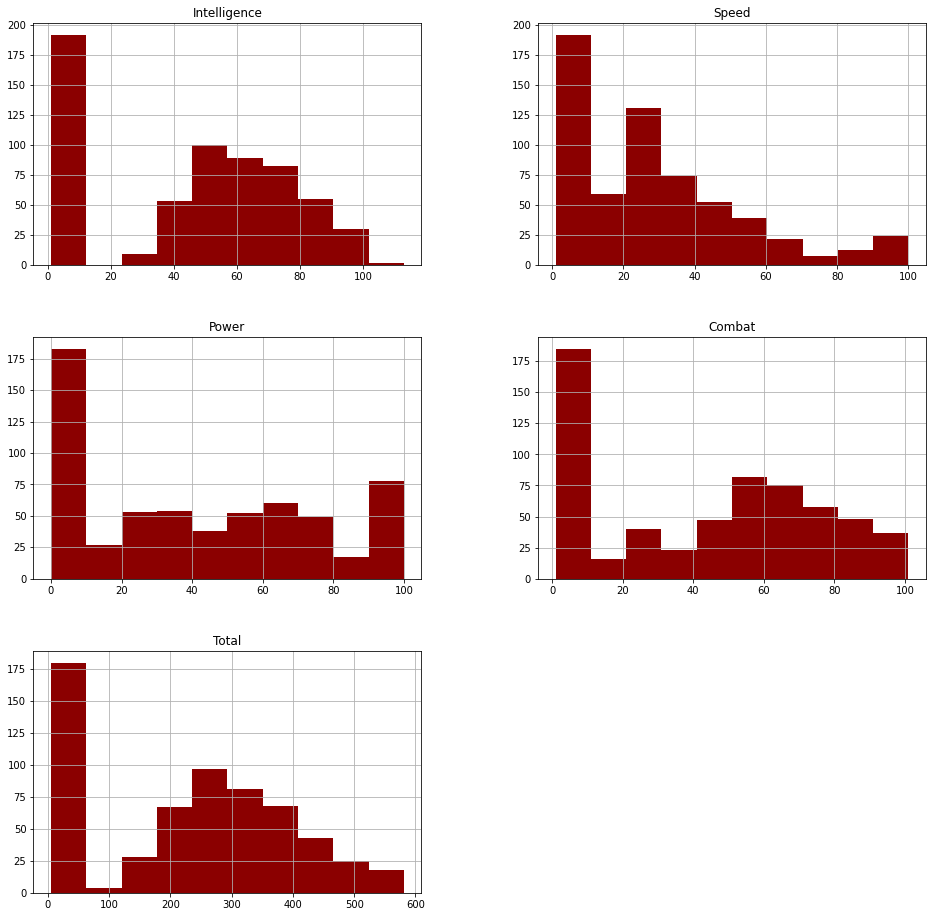

In [ ]:
CharStat.drop(['Strength','Durability'],axis=1).hist(bins = 10,color='darkred')
plt.show()

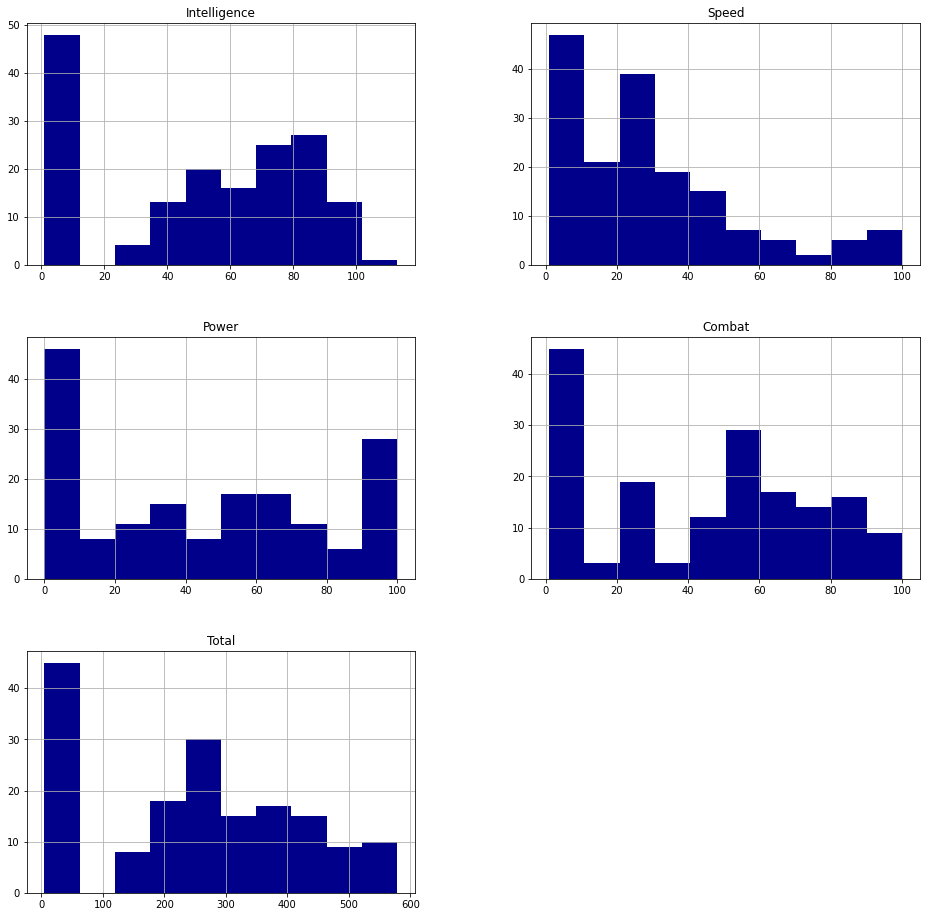

In [ ]:
CharStat_Bad.drop(['Strength','Durability'],axis=1).hist(bins = 10,color='darkblue')
plt.show()

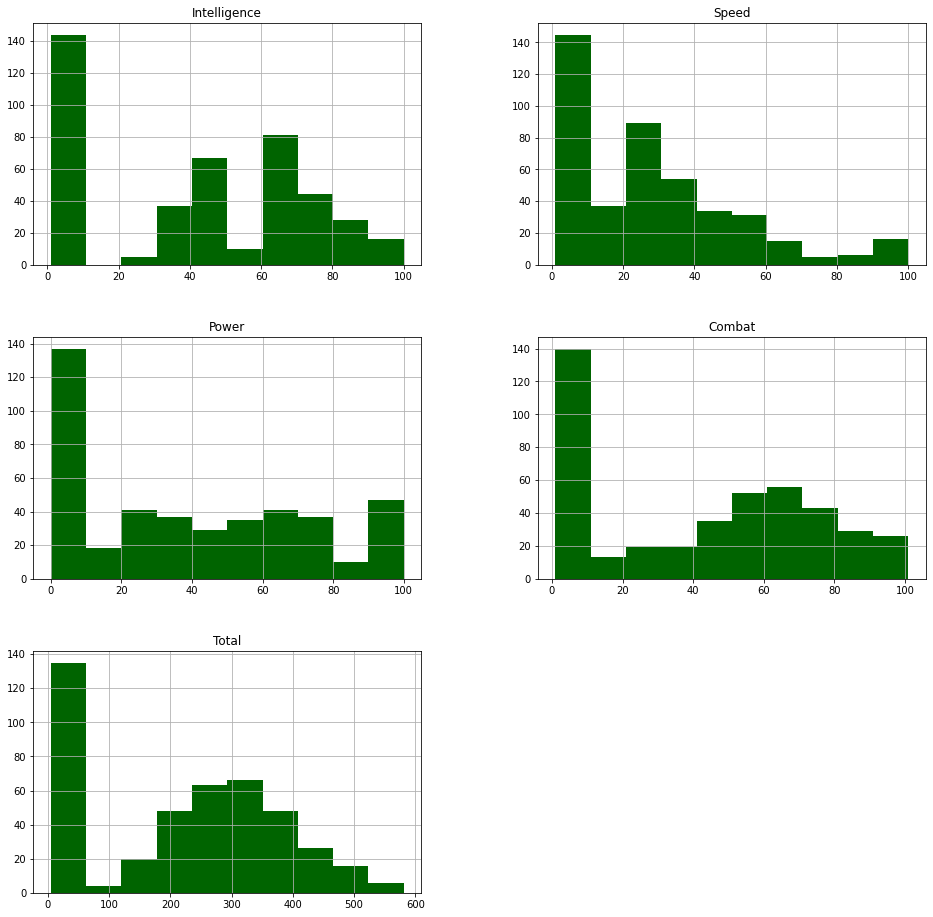

In [ ]:
CharStat_Good.drop(['Strength','Durability'],axis=1).hist(bins = 10,color='darkgreen')
plt.show()

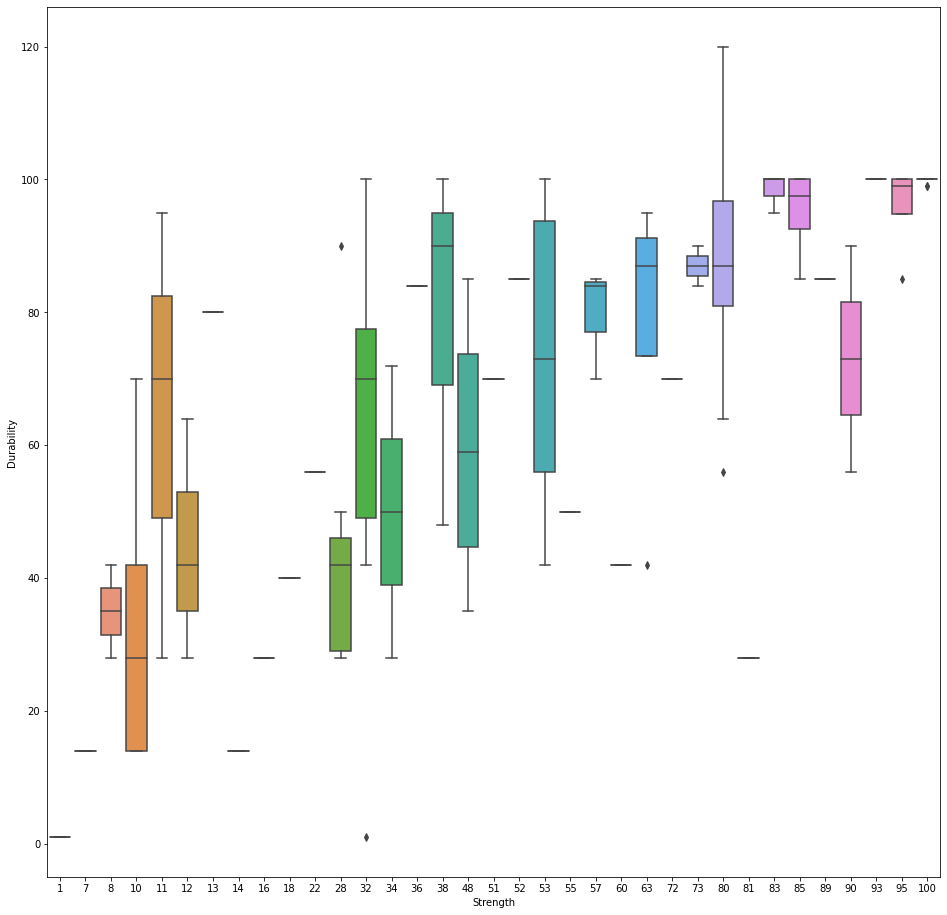

In [ ]:
ax = sb.boxplot(x="Strength", y="Durability", data=CharStat_Bad)

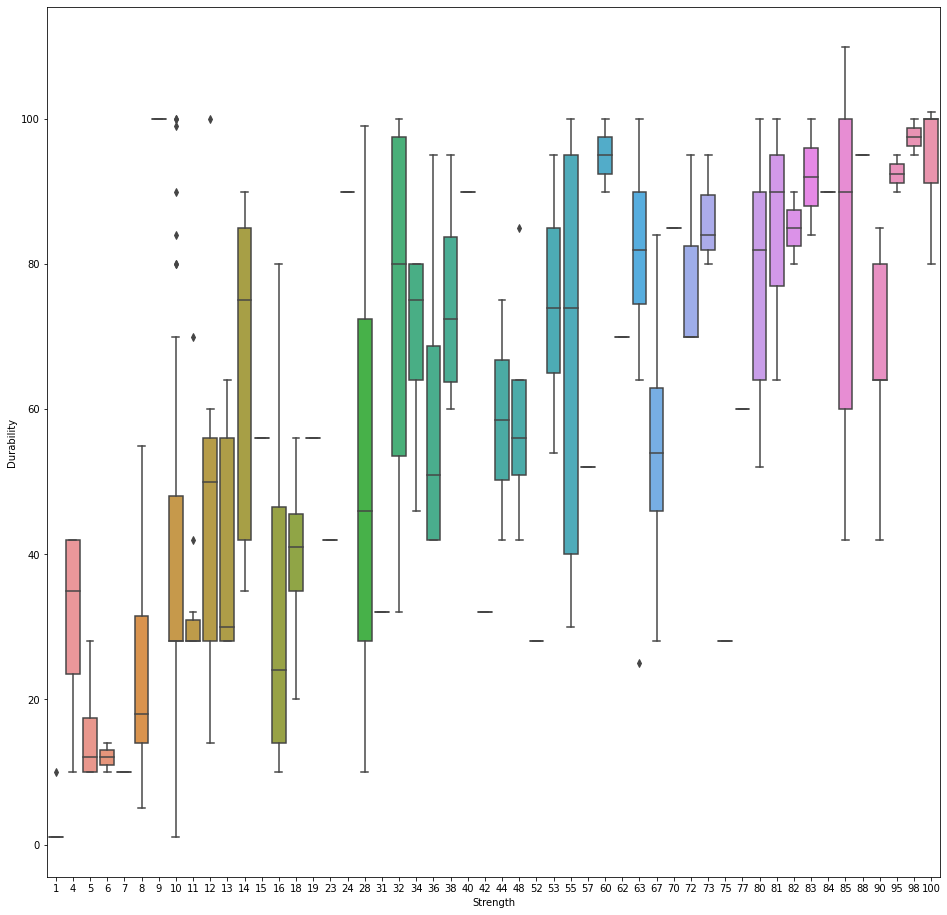

In [ ]:
ax = sb.boxplot(x="Strength", y="Durability", data=CharStat_Good)

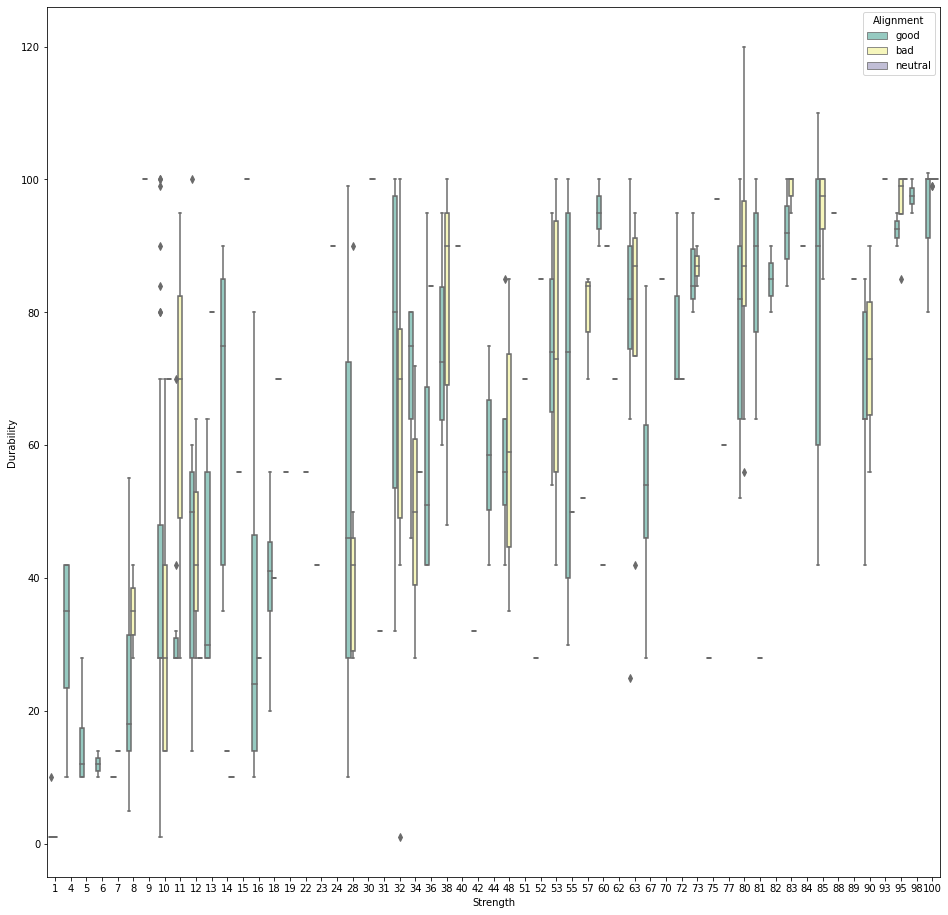

In [ ]:
plt.figure(figsize=(16,16))
ax = sb.boxplot(x="Strength", y="Durability", hue="Alignment",
                 data=CharStat, palette="Set3")

In [ ]:
CharStat.corr(method= 'pearson') 

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Intelligence,1.000000,0.565508,0.619845,0.683933,0.720550,0.783679,0.856352
Strength,0.565508,1.000000,0.640657,0.793649,0.639829,0.575045,0.824557
Speed,0.619845,0.640657,1.000000,0.704255,0.683467,0.594568,0.813902
Durability,0.683933,0.793649,0.704255,1.000000,0.756840,0.679583,0.907441
Power,0.720550,0.639829,0.683467,0.756840,1.000000,0.653452,0.873359
Combat,0.783679,0.575045,0.594568,0.679583,0.653452,1.000000,0.839966
Total,0.856352,0.824557,0.813902,0.907441,0.873359,0.839966,1.000000


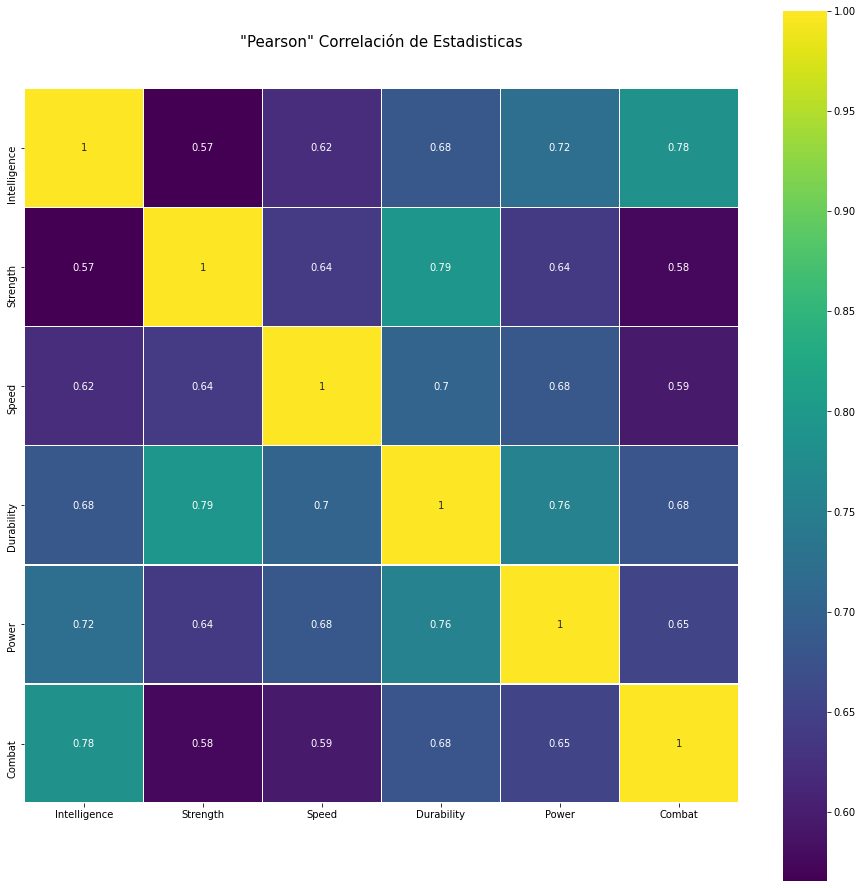

In [ ]:
CharStat_Heat = CharStat.drop(['Total'],axis= 1)
colormap = plt.cm.viridis
plt.title('"Pearson" Correlación de Estadisticas', y=1.05, size=15)
sb.heatmap(CharStat_Heat.corr(), linewidths=0.1, vmax=1.0, square=True, 
           cmap=colormap, linecolor='white', annot=True);

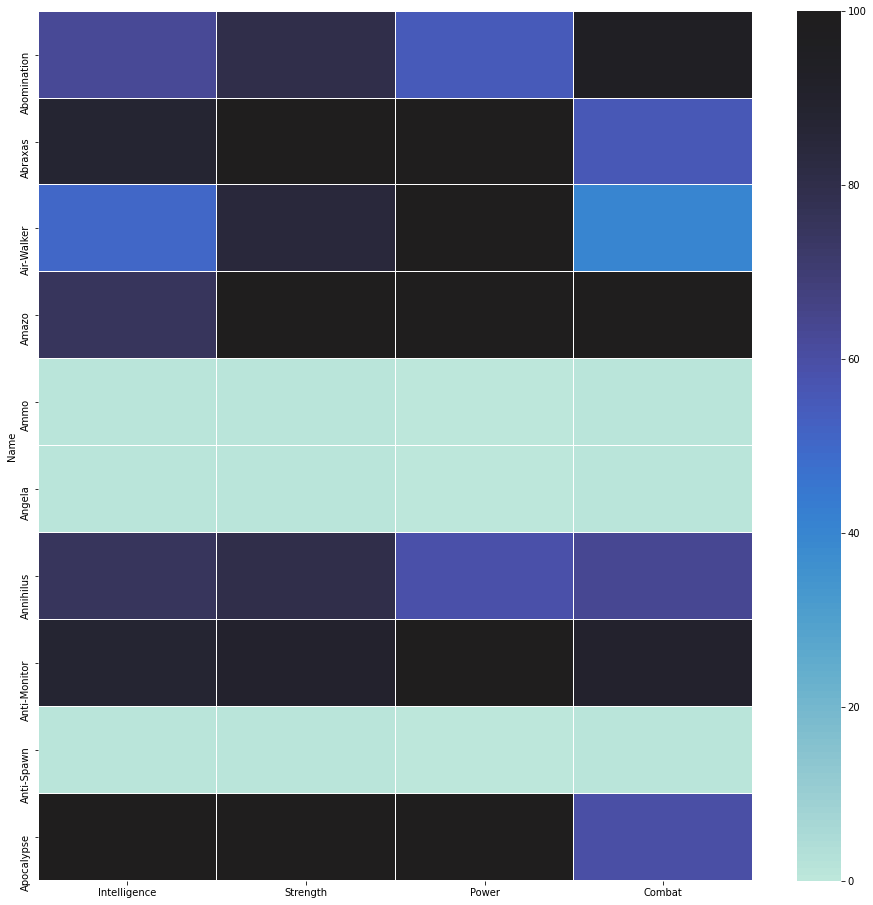

In [ ]:
ax = sb.heatmap(CharStat_Bad[0:10].set_index('Name').drop(["Alignment",'Speed','Durability','Total'],axis = 1),linewidths = 0.01,center = 100)

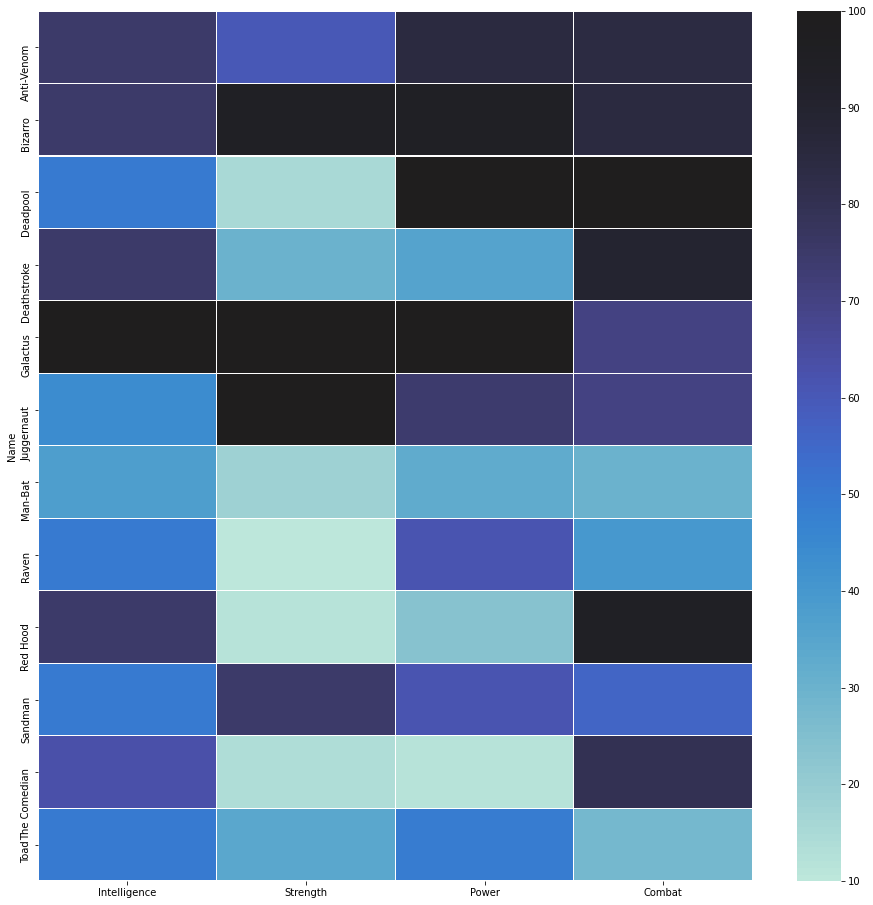

In [ ]:
ax = sb.heatmap(CharStat_Neutral.set_index('Name').drop(["Alignment",'Speed','Durability','Total'],axis = 1),linewidths = 0.01,center = 100)

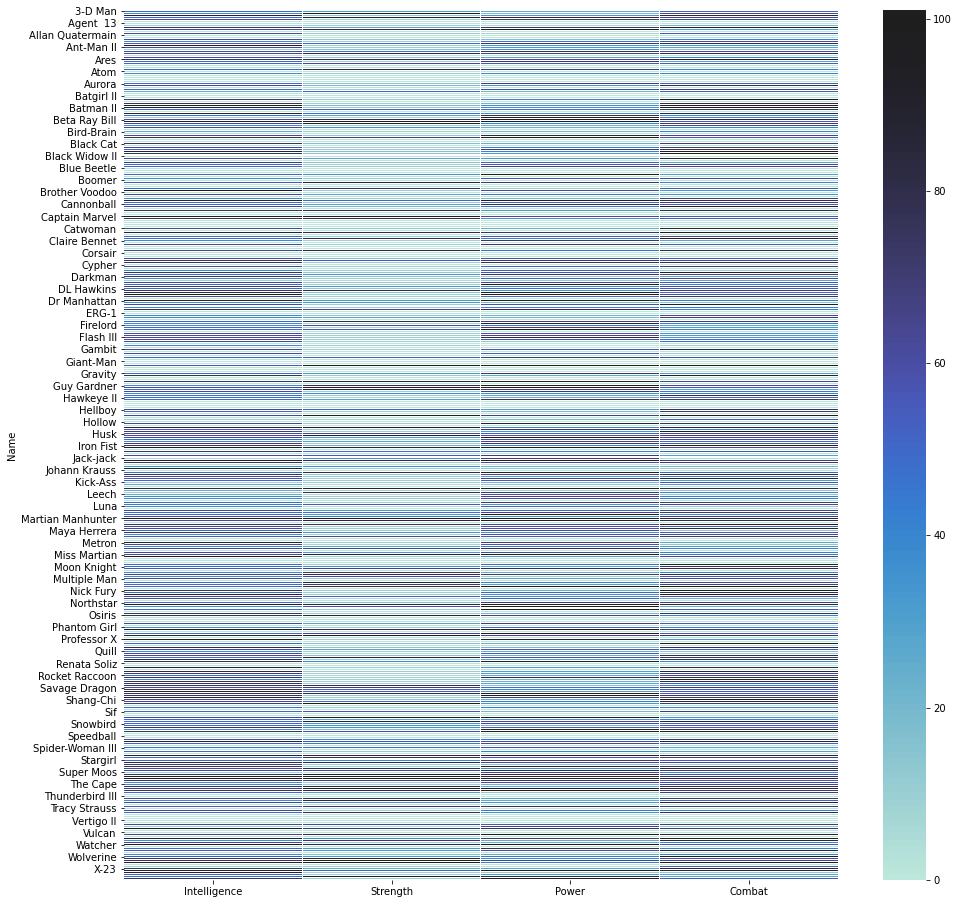

In [ ]:
ax = sb.heatmap(CharStat_Good.set_index('Name').drop(["Alignment",'Speed','Durability','Total'],axis = 1),linewidths = 0.01,center = 100)


	





*   **¿Hay alguna variable que no aporta información?**
En nuestro caso consideramos que todas las variables aportan algo a nuestro análisis pues cada columna representa una estadística de los héroes 
*   **Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?**
Creo que una de las variables que podría ser eliminada es la correspondiente a poder pues dicha variable sería muy similar a fuerza y a combate
*   **¿Existen variables que tengan datos extraños?**
Las variables únicamente contienen números a excepción del nombre y el alignment que son strings, la base de datos esta bien normalizada y no se presentaron esos problemas.
*   **Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?**
Si, el rango de las diferentes estadísticas va de 0 a 100 habiendo únicamente algunas excepciones mayores a 100 por uno cuantos puntos 
*   **¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?**
Los diferentes personajes pueden ser agrupados en tres grandes grupos los buenos que considera a los héroes, los malos esta sección esta compuesta por los villanos y por último los neutrales que serían los considerados antihéroes. Igualmente se pueden agrupar por estadísticas similares como Inteligencia, Fuerza y Habilidad de combate.







### **Patrones con K-means**

In [ ]:
X = scale(CharStat.drop(['Alignment','Name','Total'],axis=1))
CharStat["Estado"] = ""
CharStat["Estado"] = np.where((CharStat['Alignment'] == 'good'),0,CharStat["Estado"])
CharStat["Estado"] = np.where((CharStat['Alignment'] == 'bad'),1 ,CharStat["Estado"] )
CharStat["Estado"] = np.where((CharStat['Alignment'] == 'neutral'),2,CharStat["Estado"])
y = pd.DataFrame(CharStat.Estado)
y.columns = ['Targets']
y['Targets'] = y.Targets.astype(int)
X[0:10,]
clustering = KMeans(n_clusters=3, random_state = 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Clasificación K-Means')

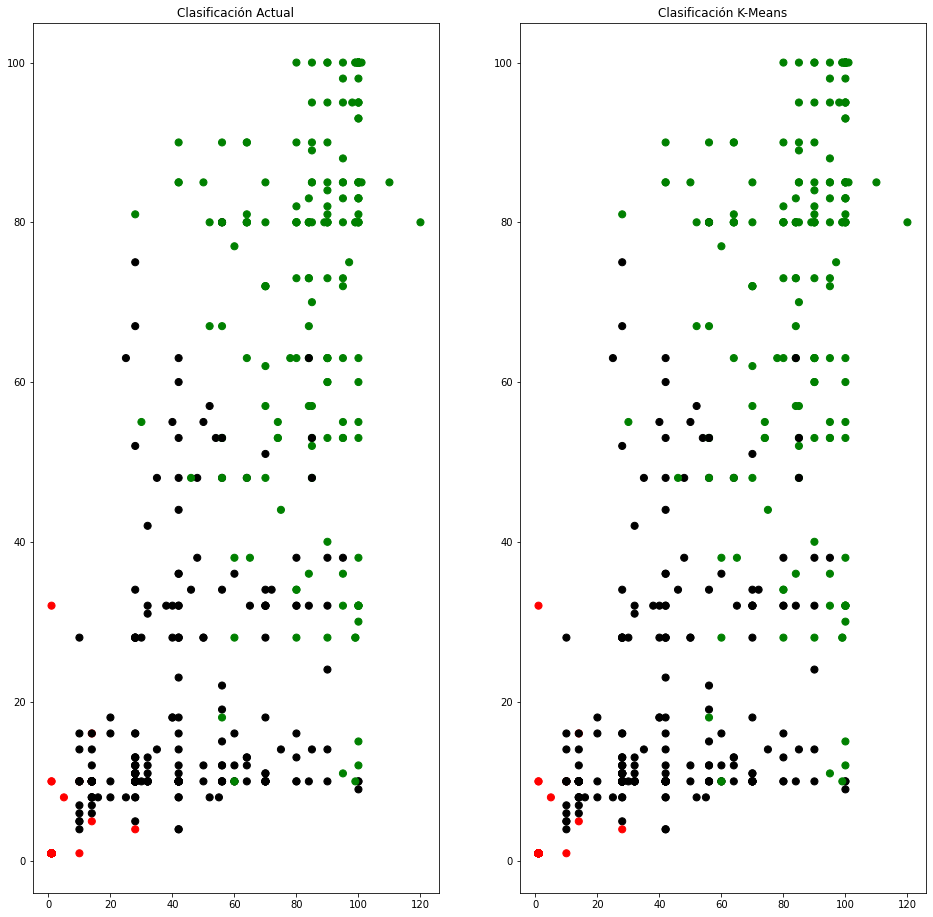

In [ ]:
color_theme = np.array(['Red', 'Black','Green'])
plt.subplot (1,2,1)
plt.scatter(x=CharStat.Durability, y=CharStat.Strength,c=color_theme[clustering.labels_], s=50)
plt.title ("Clasificación Actual") 

plt.subplot (1,2,2)
plt.scatter(x=CharStat.Durability, y=CharStat.Strength, c=color_theme[clustering.labels_], s=50)
plt.title ("Clasificación K-Means")

Text(0.5, 1.0, 'Clasificación K-Means')

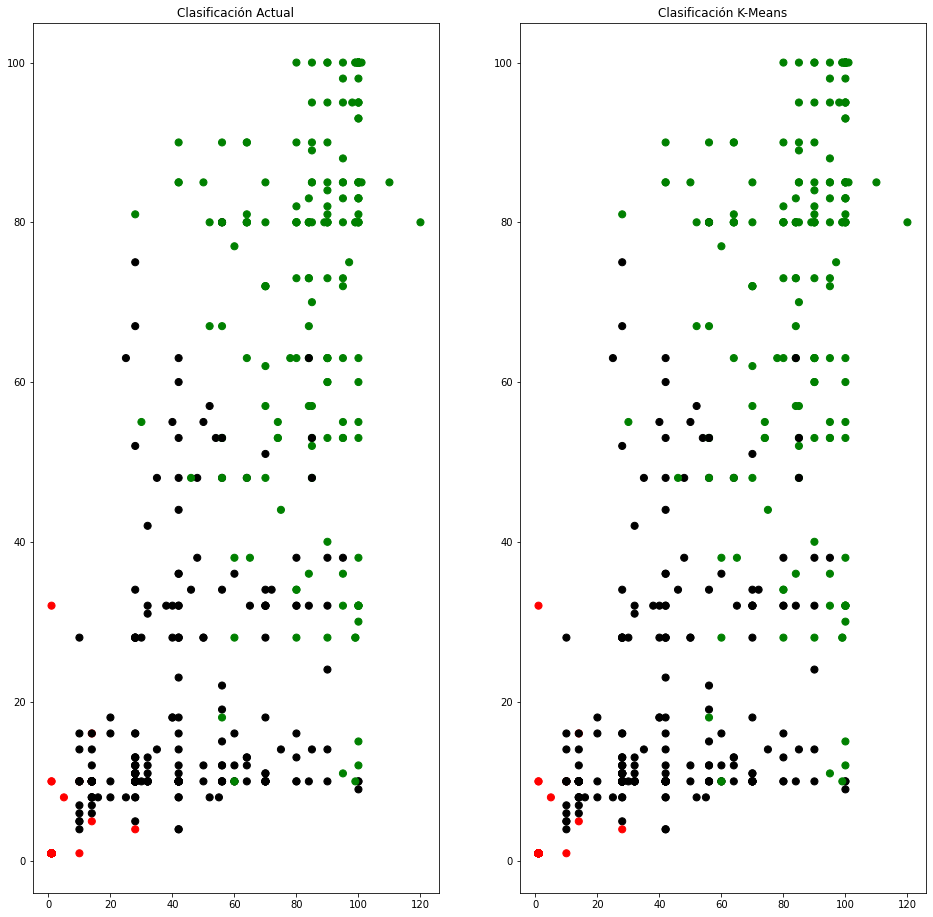

In [ ]:
relabel = np.choose (clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot (1,2,1)
plt.scatter(x=CharStat.Durability, y=CharStat.Strength,c=color_theme[clustering.labels_], s=50)
plt.title ("Clasificación Actual") 

plt.subplot (1,2,2)
plt.scatter(x=CharStat.Durability, y=CharStat.Strength, c=color_theme[clustering.labels_], s=50)
plt.title ("Clasificación K-Means")

In [ ]:
print (classification_report(y, relabel))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50       432
           1       0.30      0.33      0.32       167
           2       0.00      0.00      0.00        12

    accuracy                           0.37       611
   macro avg       0.34      0.24      0.27       611
weighted avg       0.58      0.37      0.44       611



# Preguntas de Análisis
*   ***¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?***
No, debido a que la forma de distribución de datos es bastante aleatoria presentando en las gráficas la representación conjunta de varios conjuntos que no deberían interactuar, para poder adquirir resultados correctos.
*   ***¿Cómo obtuviste el valor de k a usar?***
El valor se obtuvo por medio de la utilización de una función llamada Kmeans la cual con base a un numero de clúster y de estados aleatorios genera una K que después por medio de una función fit() ajusta la K al modelo definido.
*   ***¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?***
Consideramos que en cualquiera de ambos casos no se obtendrá el resultado deseado debido a la distribución de la tabla y tambien podemos tomar en cuenta la ambigüedad de la tarea de clasificar a Héroes o Villanos solo por medio de estadísticas de fuerza y aguante.
*   ***¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?***
En general todos nuestros centros en las representaciones tuvieron que prácticamente entrelazarse debido a la forma en la que nuestras muestras están dispersas teniendo en la mayoría de los casos, muestras de Héroes que directamente se empalmaban con muestra de villanos.
*   ***¿Qué pasaría con los centros si tuviéramos muchos outliners en el análisis de cajas y bigotes?***
Los centros tendrían que expandirse de manera innecesaria para poder alcanzar dichos casos de outliers, con lo cual llevaría a tener un modelo final erróneo, debido a que en el peor de los casos esta expansión de los centros llevaría a chocar con otros círculos alterando de manera negativa el sistema. 
*   ***¿Qué puedes decir de los datos basándose en los centros?***
Que el resultado de implementar un análisis de Kmeans no es para nada óptimo para los datos que nosotros recolectamos, debido principalmente a la ambigüedad de los mismos, presentando en este caso solo estadísticas discriminatorias de héroes y villanos con las cuales no se puede afirmar con seguridad que tipo de personaje son solo con base a sus estadísticas y esto se ve representado en nuestro modelo teniendo una precisión final promediada de 37%

